dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

REGRESSION RESULTS (DIABETES)

                    Model          MSE       RMSE  R2 Score
0       Linear Regression  2900.193628  53.853446  0.452603
1                   Ridge  3077.415939  55.474462  0.419153
2                   Lasso  3403.575722  58.340172  0.357592
3              ElasticNet  5311.212822  72.878068 -0.002465
4           Decision Tree  4976.797753  70.546423  0.060654
5                     KNN  3019.075506  54.946115  0.430164
6  SGD (Gradient Descent)  3111.880569  55.784232  0.412648


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


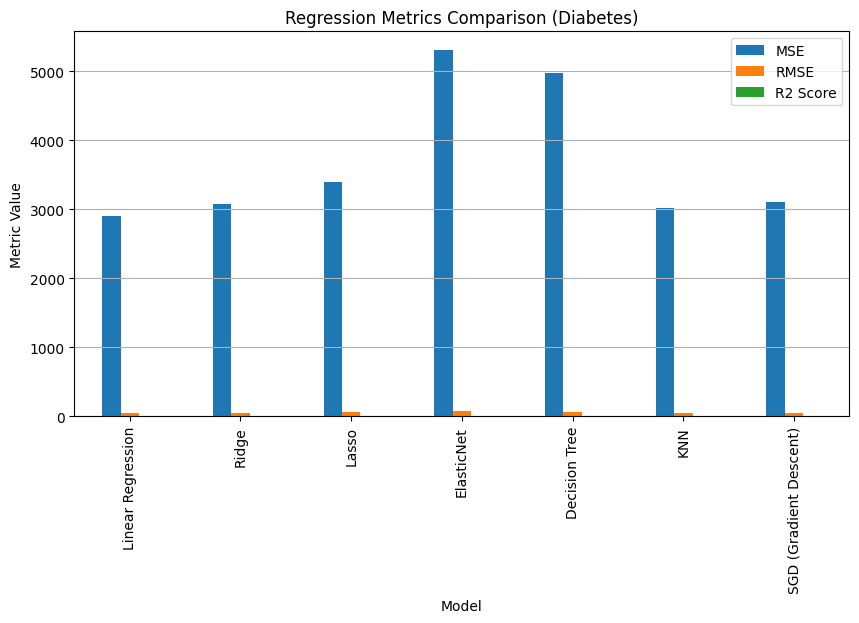

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score)
from sklearn.datasets import load_iris, load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SGD (Gradient Descent)": SGDRegressor(random_state=42)
}
reg_results = []
for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    reg_results.append([name, mse, rmse, r2])
reg_df = pd.DataFrame(
    reg_results,
    columns=["Model", "MSE", "RMSE", "R2 Score"]
)
print("\nREGRESSION RESULTS (DIABETES)\n")
print(reg_df)
reg_df.set_index("Model").plot(kind="bar", figsize=(10,5))
plt.title("Regression Metrics Comparison (Diabetes)")
plt.ylabel("Metric Value")
plt.grid(axis="y")
plt.show()

